In [57]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import yfinance as yf

import seaborn as sns

yf.pdr_override()

import pandas as pd

import numpy as np

import datetime as dt

%matplotlib inline

In [58]:
df =pd.read_csv(r'C:\Users\Nahuel\Documents\GitHub\Superstore_Capstone\Data\Superstore.csv', encoding='windows-1252')

In [59]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [60]:
df['Profit'].values

array([ 41.9136, 219.582 ,   6.8714, ...,  19.3932,  13.32  ,  72.948 ])

In [61]:
df.drop('Country',axis=1,inplace=True)
df.drop('City',axis=1,inplace=True)
df.drop('State',axis=1,inplace=True)
df.drop('Postal Code',axis=1,inplace=True)
df.drop('Region',axis=1,inplace=True)
df.drop('Profit',axis=1,inplace=True)
df.drop('Row ID',axis=1,inplace=True)

In [62]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
0,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00
1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00
2,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00
3,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45
4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20


In [63]:
df['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

In [64]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
dtype: int64

In [65]:

df.corr()

,Sales,Quantity,Discount
Sales,1.000000,0.200795,-0.028190
Quantity,0.200795,1.000000,0.008623
Discount,-0.028190,0.008623,1.000000


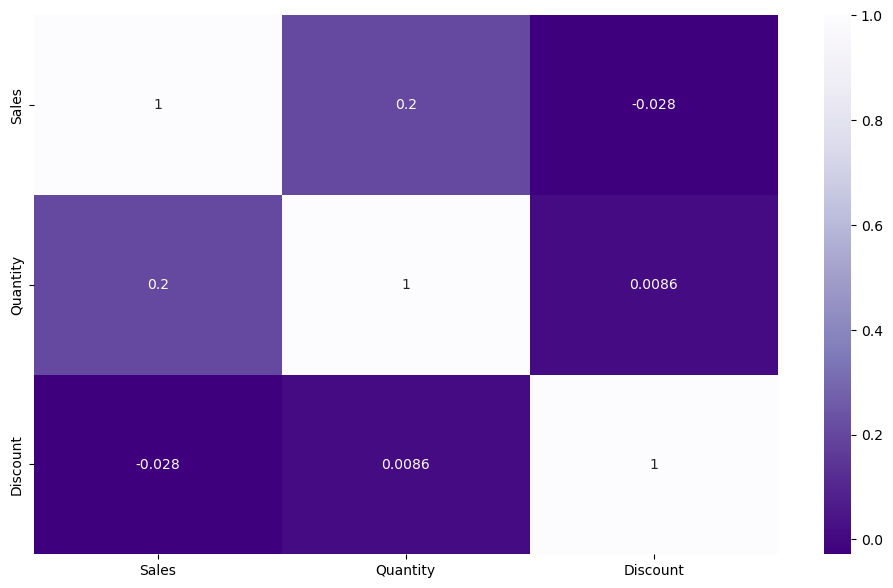

In [66]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Purples_r')
plt.show()

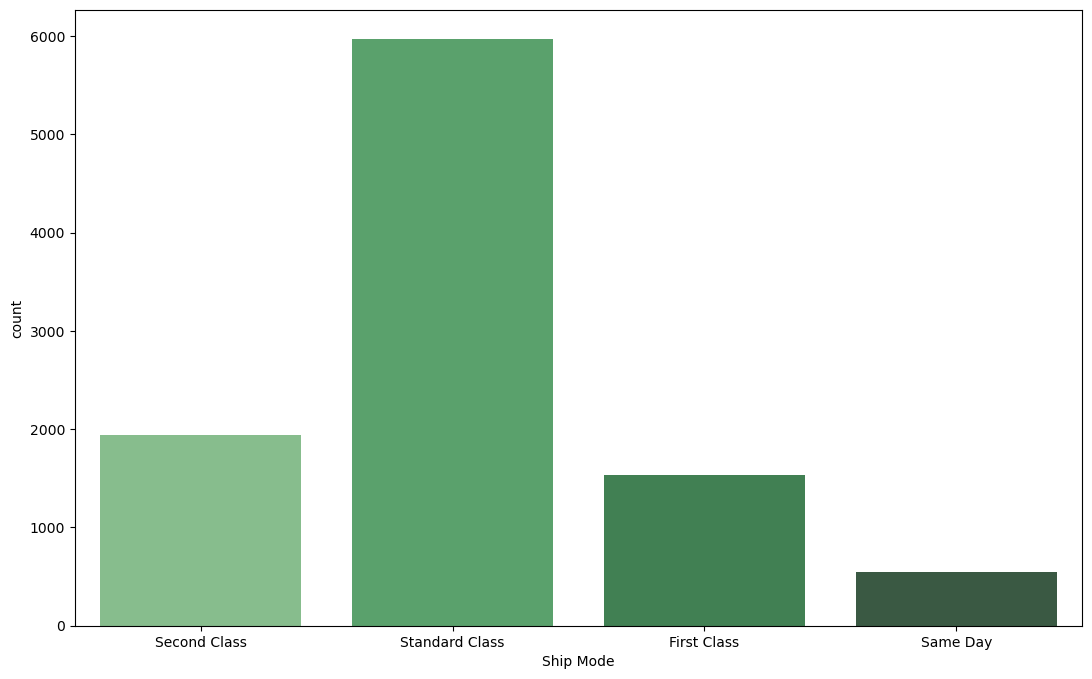

In [67]:
plt.figure(figsize=(13,8))
sns.countplot(x='Ship Mode',data=df,palette='Greens_d')
plt.show()

#### This 2 graphs are here on a way to prove if the data and the pandas work.

In [68]:
print(f'data shape: {df.shape}')
summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
summ['Missing#'] = df.isna().sum()
summ['Missing%'] = (df.isna().sum())/len(df)
summ['Dups'] = df.duplicated().sum()
summ['Uniques'] = df.nunique().values
summ['Count'] = df.count().values
desc = pd.DataFrame(df.describe(include='all').transpose())
summ['Min'] = desc['min'].values
summ['Max'] = desc['max'].values
summ['Average'] = desc['mean'].values
summ['Standard Deviation'] = desc['std'].values
summ['First Value'] = df.loc[0].values
summ['Second Value'] = df.loc[1].values
summ['Third Value'] = df.loc[2].values

display(summ)

data shape: (9994, 14)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Order ID,object,0,0.0,1,5009,9994,NaN,NaN,NaN,NaN,CA-2013-152156,CA-2013-152156,CA-2013-138688
Order Date,object,0,0.0,1,1238,9994,NaN,NaN,NaN,NaN,09-11-2013,09-11-2013,13-06-2013
Ship Date,object,0,0.0,1,1334,9994,NaN,NaN,NaN,NaN,12-11-2013,12-11-2013,17-06-2013
Ship Mode,object,0,0.0,1,4,9994,NaN,NaN,NaN,NaN,Second Class,Second Class,Second Class
Customer ID,object,0,0.0,1,793,9994,NaN,NaN,NaN,NaN,CG-12520,CG-12520,DV-13045
Customer Name,object,0,0.0,1,793,9994,NaN,NaN,NaN,NaN,Claire Gute,Claire Gute,Darrin Van Huff
Segment,object,0,0.0,1,3,9994,NaN,NaN,NaN,NaN,Consumer,Consumer,Corporate
Product ID,object,0,0.0,1,1862,9994,NaN,NaN,NaN,NaN,FUR-BO-10001798,FUR-CH-10000454,OFF-LA-10000240
Category,object,0,0.0,1,3,9994,NaN,NaN,NaN,NaN,Furniture,Furniture,Office Supplies
Sub-Category,object,0,0.0,1,17,9994,NaN,NaN,NaN,NaN,Bookcases,Chairs,Labels


### This data is clean from NaN values, Nulls and duplicates.

In [69]:
df.describe(include=object)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1238,1334,4,793,793,3,1862,3,17,1841
top,CA-2014-100111,06-09-2013,16-12-2012,Standard Class,WB-21850,William Brown,Consumer,OFF-PA-10001970,Office Supplies,Binders,Staples
freq,14,38,35,5968,37,37,5191,19,6026,1523,227


In [70]:
df =pd.read_csv(r'C:\Users\Nahuel\Documents\GitHub\Superstore_Capstone\Data\Superstore.csv', encoding='windows-1252')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

In [71]:

# Add new columns year, month and day
df["year"] = df["Order Date"].dt.year

# add new column month
df["month"] = df["Order Date"].dt.month_name()

# add new column day
df["day"] = df["Order Date"].dt.day_name()

# We can drop some columns we don't use in analysis
df.drop(columns = ["Customer ID", "Product ID", "Row ID"], inplace = True)

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month,day
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013,November,Saturday
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013,November,Saturday
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2013,June,Thursday
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012,October,Thursday
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012,October,Thursday


#### Now I start to analyze the data
First with the profit because is the most important thing for a company.